In [1]:
import pandas as pd
import matplotlib.pyplot as plt
parking_data = pd.read_excel("Parking data final.xlsx")
del parking_data['Unnamed: 0']
del parking_data['Unnamed: 0.1']
parking_data


,deviceName,device_label,time,park_flag_c,duration_occupied,duration_free,2h_overstay,frame_count,frame_type,status,timestamp,location,address
0,Parking_2532,70b3d53af0032532,2020-09-20T18:41:22+10:00,1,0.00,11.08,0,6,171,1,1600591282233,"-38.1482576,144.3638867","Officeworks, 150, Malop Street, Geelong, City ..."
1,Parking_2532,70b3d53af0032532,2020-09-20T11:38:31+10:00,0,1280.25,0.00,1,2,171,0,1600565911226,"-38.1482576,144.3638867","Officeworks, 150, Malop Street, Geelong, City ..."
2,Parking_2535,70b3d53af0032535,2020-09-20T18:36:45+10:00,0,1.42,0.00,0,10,171,0,1600591005250,"-38.148484,144.362902","Yarra Street, Geelong, City of Greater Geelong..."
3,Parking_2535,70b3d53af0032535,2020-09-20T18:58:56+10:00,0,0.20,0.00,0,12,171,0,1600592336996,"-38.148484,144.362902","Yarra Street, Geelong, City of Greater Geelong..."
4,Parking_2535,70b3d53af0032535,2020-09-20T17:04:23+10:00,0,18.11,0.00,0,8,171,0,1600585463302,"-38.148484,144.362902","Yarra Street, Geelong, City of Greater Geelong..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41974,Parking_2667,70b3d53af0032667,2020-10-29T15:54:05+11:00,1,0.00,0.23,0,15,171,1,1603947245502,"-38.1483584,144.3646351","159,161, Malop Street, Geelong, City of Greate..."
41975,Parking_2667,70b3d53af0032667,2020-10-29T19:52:29+11:00,1,0.00,53.67,0,1,171,1,1603961549410,"-38.1483584,144.3646351","159,161, Malop Street, Geelong, City of Greate..."
41976,Parking_2667,70b3d53af0032667,2020-10-29T12:39:12+11:00,1,0.00,0.40,0,9,171,1,1603935552482,"-38.1483584,144.3646351","159,161, Malop Street, Geelong, City of Greate..."
41977,Parking_2667,70b3d53af0032667,2020-10-29T12:24:33+11:00,1,0.00,0.12,0,7,171,1,1603934673251,"-38.1483584,144.3646351","159,161, Malop Street, Geelong, City of Greate..."


Text(0.5, 1.0, 'Parking duration occupied')

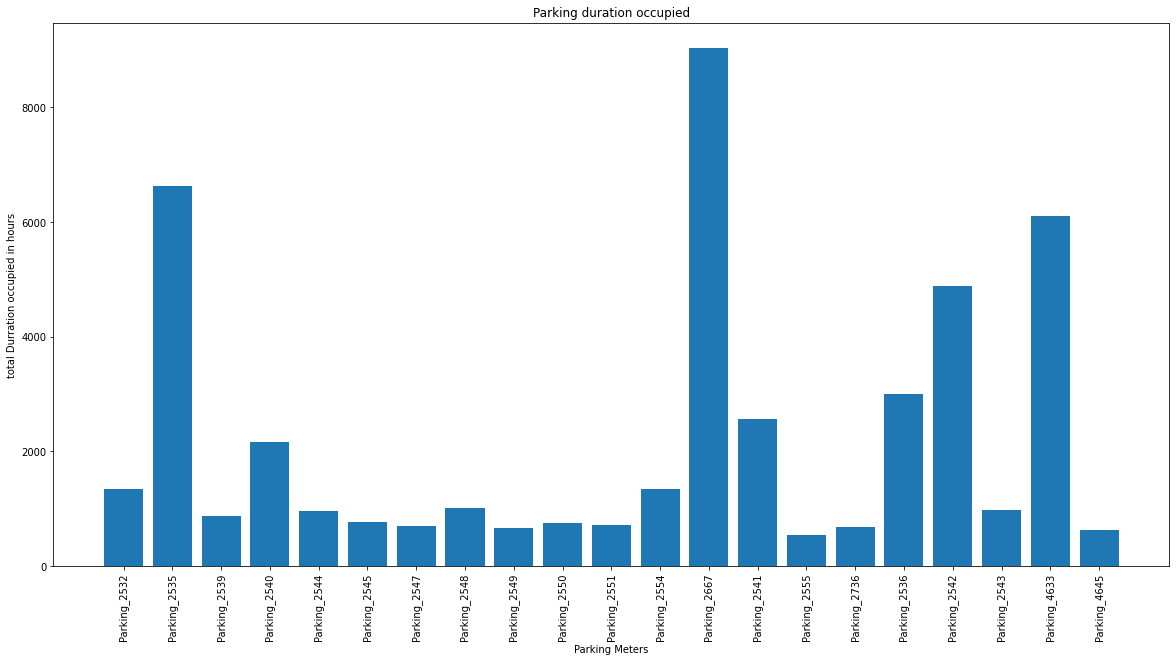

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(parking_data['deviceName'],parking_data['duration_occupied'])
plt.xticks(rotation=90)
plt.xlabel('Parking Meters')
plt.ylabel('total Durration occupied in hours')
plt.title('Parking duration occupied')

Text(0.5, 1.0, 'Parking duration free')

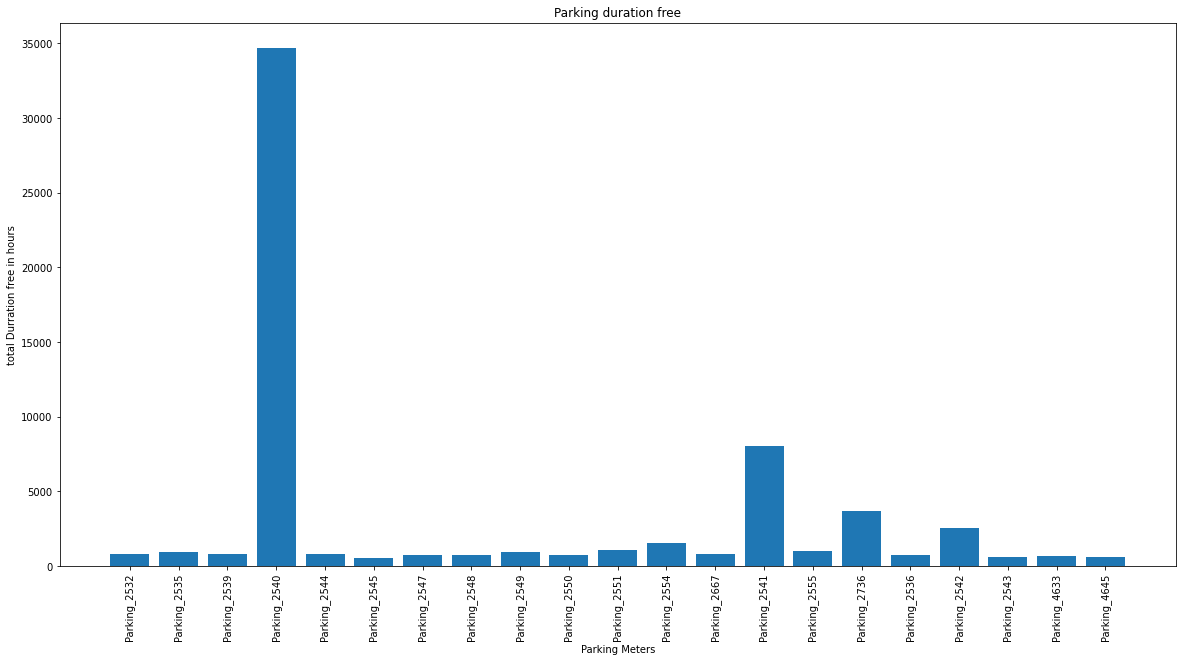

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(parking_data['deviceName'],parking_data['duration_free'])
plt.xticks(rotation=90)
plt.xlabel('Parking Meters')
plt.ylabel('total Durration free in hours')
plt.title('Parking duration free')

In [2]:
parking_data[['Date', 'time']] = parking_data['time'].str.split('T', 1, expand=True)
parking_data[['lattitude', 'longitude']] = parking_data['location'].str.split(',', 1, expand=True)
parking_data

,deviceName,device_label,time,park_flag_c,duration_occupied,duration_free,2h_overstay,frame_count,frame_type,status,timestamp,location,address,Date,lattitude,longitude
0,Parking_2532,70b3d53af0032532,18:41:22+10:00,1,0.00,11.08,0,6,171,1,1600591282233,"-38.1482576,144.3638867","Officeworks, 150, Malop Street, Geelong, City ...",2020-09-20,-38.1482576,144.3638867
1,Parking_2532,70b3d53af0032532,11:38:31+10:00,0,1280.25,0.00,1,2,171,0,1600565911226,"-38.1482576,144.3638867","Officeworks, 150, Malop Street, Geelong, City ...",2020-09-20,-38.1482576,144.3638867
2,Parking_2535,70b3d53af0032535,18:36:45+10:00,0,1.42,0.00,0,10,171,0,1600591005250,"-38.148484,144.362902","Yarra Street, Geelong, City of Greater Geelong...",2020-09-20,-38.148484,144.362902
3,Parking_2535,70b3d53af0032535,18:58:56+10:00,0,0.20,0.00,0,12,171,0,1600592336996,"-38.148484,144.362902","Yarra Street, Geelong, City of Greater Geelong...",2020-09-20,-38.148484,144.362902
4,Parking_2535,70b3d53af0032535,17:04:23+10:00,0,18.11,0.00,0,8,171,0,1600585463302,"-38.148484,144.362902","Yarra Street, Geelong, City of Greater Geelong...",2020-09-20,-38.148484,144.362902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41974,Parking_2667,70b3d53af0032667,15:54:05+11:00,1,0.00,0.23,0,15,171,1,1603947245502,"-38.1483584,144.3646351","159,161, Malop Street, Geelong, City of Greate...",2020-10-29,-38.1483584,144.3646351
41975,Parking_2667,70b3d53af0032667,19:52:29+11:00,1,0.00,53.67,0,1,171,1,1603961549410,"-38.1483584,144.3646351","159,161, Malop Street, Geelong, City of Greate...",2020-10-29,-38.1483584,144.3646351
41976,Parking_2667,70b3d53af0032667,12:39:12+11:00,1,0.00,0.40,0,9,171,1,1603935552482,"-38.1483584,144.3646351","159,161, Malop Street, Geelong, City of Greate...",2020-10-29,-38.1483584,144.3646351
41977,Parking_2667,70b3d53af0032667,12:24:33+11:00,1,0.00,0.12,0,7,171,1,1603934673251,"-38.1483584,144.3646351","159,161, Malop Street, Geelong, City of Greate...",2020-10-29,-38.1483584,144.3646351


In [3]:


parking_data.to_excel('Parking_data1.xlsx')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Date')

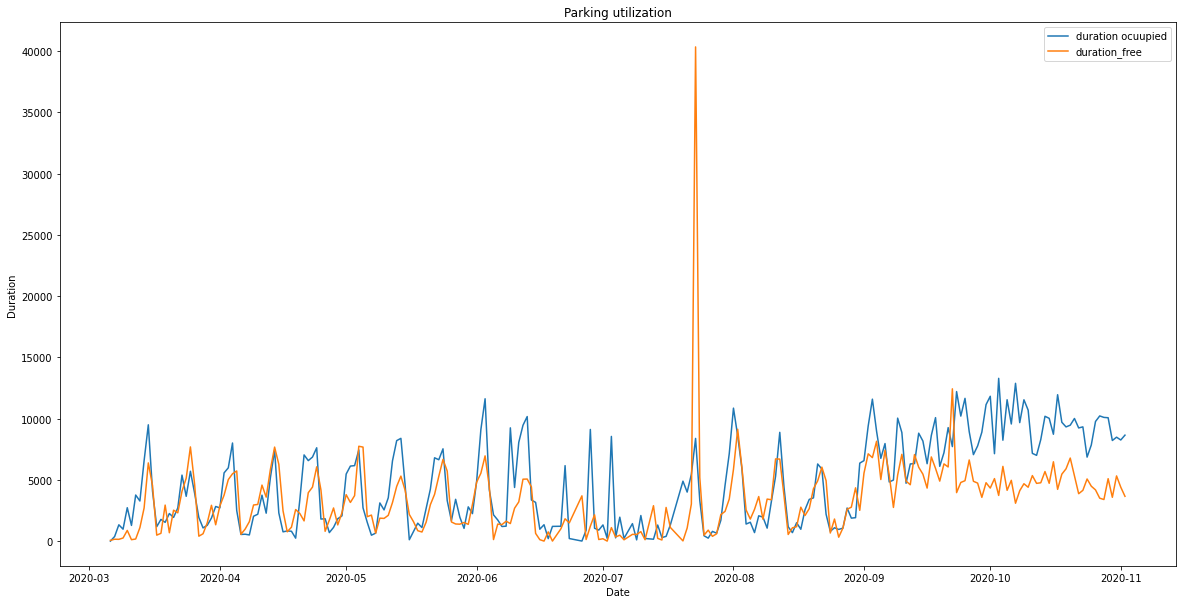

In [5]:
from datetime import datetime
parking_data1 = pd.read_excel("Parking_data1.xlsx")
groupparking_data = parking_data1.groupby('Date')['duration_occupied','duration_free'].sum().reset_index()
groupparking_data['Date'] = pd.to_datetime(groupparking_data['Date'])
groupparking_data.set_index('Date', inplace=True)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
plt.plot(groupparking_data.index.values,groupparking_data['duration_occupied'],label = 'duration ocuupied')
plt.plot(groupparking_data.index.values,groupparking_data['duration_free'],label = 'duration_free')
plt.legend()
plt.title('Parking utilization')
plt.ylabel('Duration')
plt.xlabel('Date')

In [6]:
from datetime import datetime

parking_data1['Date'] =  pd.to_datetime(parking_data1['Date'], format='%Y/%m/%d')
parking_data1['Weekdays'] = parking_data1['Date'].dt.day_name()

Text(0.5, 1.0, 'Parking duration occupied')

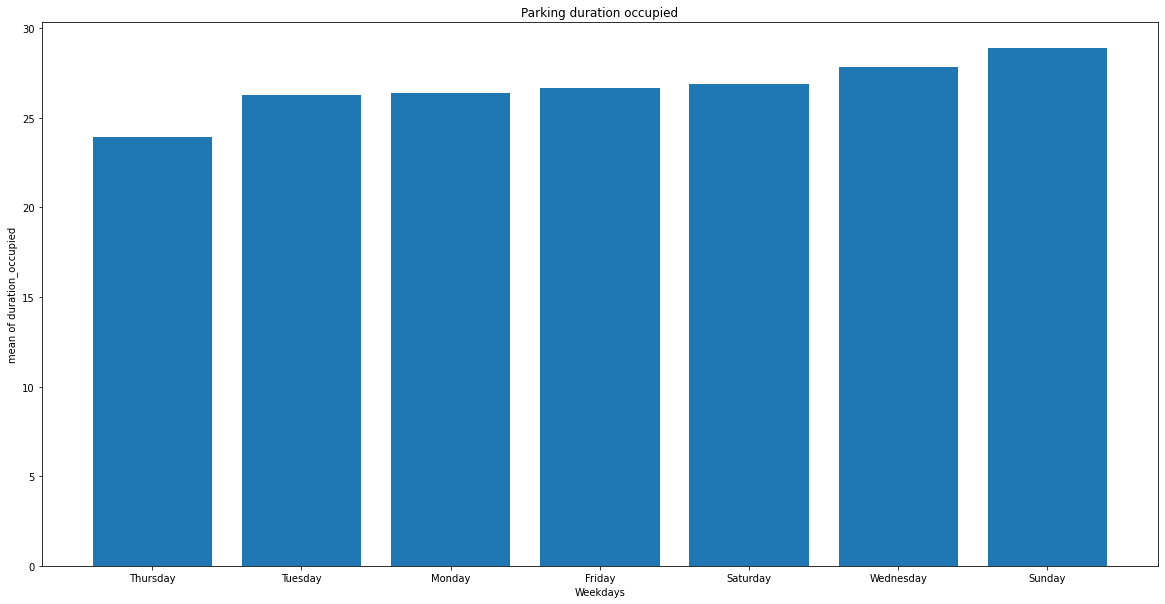

In [7]:
Weekdays_hours = parking_data1.groupby('Weekdays',as_index=False)['duration_occupied'].mean()
mean = Weekdays_hours['duration_occupied'].mean()
Weekdays_hours.sort_values('duration_occupied',inplace=True)
plt.figure(figsize=(20,10))
plt.bar(Weekdays_hours['Weekdays'],Weekdays_hours['duration_occupied'])
plt.xlabel('Weekdays')
plt.ylabel('mean of duration_occupied')
plt.title('Parking duration occupied')

In [8]:
Weekdays_delay = parking_data1.groupby('Weekdays',as_index=False)['2h_overstay'].sum()
Weekdays_delay

,Weekdays,2h_overstay
0,Friday,314
1,Monday,269
2,Saturday,291
3,Sunday,263
4,Thursday,323
5,Tuesday,249
6,Wednesday,330


In [9]:
parking_data1['time'] = parking_data1['time'].apply(lambda x: x.split('+')[0])

In [10]:
parking_data1['hours'] = pd.to_datetime(parking_data1['time'], format='%H:%M:%S').dt.hour

In [11]:
parking_data1

,Unnamed: 0,deviceName,device_label,time,park_flag_c,duration_occupied,duration_free,2h_overstay,frame_count,frame_type,status,timestamp,location,address,Date,lattitude,longitude,Weekdays,hours
0,0,Parking_2532,70b3d53af0032532,18:41:22,1,0.00,11.08,0,6,171,1,1600591282233,"-38.1482576,144.3638867","Officeworks, 150, Malop Street, Geelong, City ...",2020-09-20,-38.148258,144.363887,Sunday,18
1,1,Parking_2532,70b3d53af0032532,11:38:31,0,1280.25,0.00,1,2,171,0,1600565911226,"-38.1482576,144.3638867","Officeworks, 150, Malop Street, Geelong, City ...",2020-09-20,-38.148258,144.363887,Sunday,11
2,2,Parking_2535,70b3d53af0032535,18:36:45,0,1.42,0.00,0,10,171,0,1600591005250,"-38.148484,144.362902","Yarra Street, Geelong, City of Greater Geelong...",2020-09-20,-38.148484,144.362902,Sunday,18
3,3,Parking_2535,70b3d53af0032535,18:58:56,0,0.20,0.00,0,12,171,0,1600592336996,"-38.148484,144.362902","Yarra Street, Geelong, City of Greater Geelong...",2020-09-20,-38.148484,144.362902,Sunday,18
4,4,Parking_2535,70b3d53af0032535,17:04:23,0,18.11,0.00,0,8,171,0,1600585463302,"-38.148484,144.362902","Yarra Street, Geelong, City of Greater Geelong...",2020-09-20,-38.148484,144.362902,Sunday,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41974,41974,Parking_2667,70b3d53af0032667,15:54:05,1,0.00,0.23,0,15,171,1,1603947245502,"-38.1483584,144.3646351","159,161, Malop Street, Geelong, City of Greate...",2020-10-29,-38.148358,144.364635,Thursday,15
41975,41975,Parking_2667,70b3d53af0032667,19:52:29,1,0.00,53.67,0,1,171,1,1603961549410,"-38.1483584,144.3646351","159,161, Malop Street, Geelong, City of Greate...",2020-10-29,-38.148358,144.364635,Thursday,19
41976,41976,Parking_2667,70b3d53af0032667,12:39:12,1,0.00,0.40,0,9,171,1,1603935552482,"-38.1483584,144.3646351","159,161, Malop Street, Geelong, City of Greate...",2020-10-29,-38.148358,144.364635,Thursday,12
41977,41977,Parking_2667,70b3d53af0032667,12:24:33,1,0.00,0.12,0,7,171,1,1603934673251,"-38.1483584,144.3646351","159,161, Malop Street, Geelong, City of Greate...",2020-10-29,-38.148358,144.364635,Thursday,12


In [12]:
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Evening','Night']
parking_data1['session'] = pd.cut(parking_data1['hours'], bins=b, labels=l, include_lowest=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


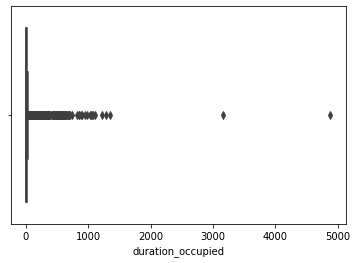

In [49]:
P_M = parking_data1[parking_data1['Weekdays']=='Monday']

sns.boxplot(P_M['duration_occupied'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


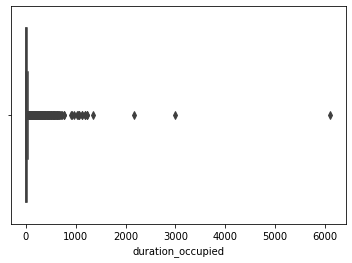

In [51]:
P_T = parking_data1[parking_data1['Weekdays']=='Tuesday']

sns.boxplot(P_T['duration_occupied'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


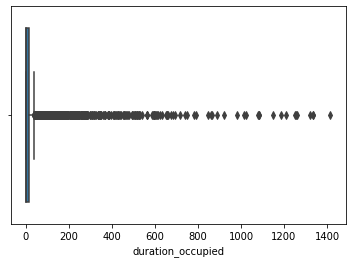

In [52]:
P_W = parking_data1[parking_data1['Weekdays']=='Wednesday']

sns.boxplot(P_W['duration_occupied'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


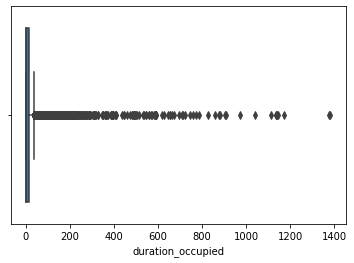

In [53]:
P_TH = parking_data1[parking_data1['Weekdays']=='Thursday']

sns.boxplot(P_TH['duration_occupied'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


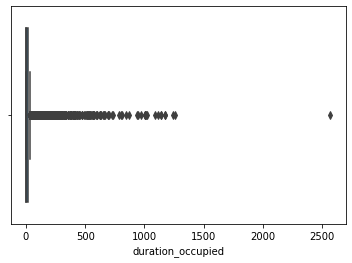

In [54]:
P_S = parking_data1[parking_data1['Weekdays']=='Saturday']

sns.boxplot(P_S['duration_occupied'])
plt.show()

In [47]:
parking_monday= parking_data1[parking_data1['Weekdays']=='Monday'].groupby('session')['duration_occupied'].mean()
parking_monday

session
Late Night       76.310392
Early Morning    36.537492
Morning          21.851102
Noon             20.759856
Evening          28.649451
Night            49.306301
Name: duration_occupied, dtype: float64

Text(0.5, 1.0, 'parking occupied in different time zones on monday')

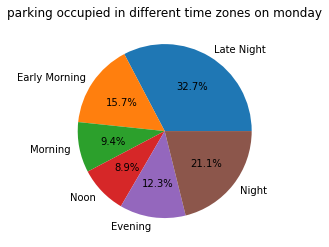

In [26]:
import pylab
parking_monday.plot.pie(autopct="%.1f%%")
pylab.ylabel('')
plt.title('parking occupied in different time zones on monday')

Text(0.5, 1.0, 'parking occupied in different time zones on tuesday')

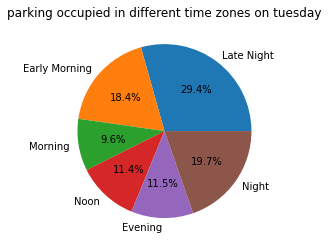

In [27]:
parking_tuesday= parking_data1[parking_data1['Weekdays']=='Tuesday'].groupby('session')['duration_occupied'].mean()
parking_tuesday.plot.pie(autopct="%.1f%%")
pylab.ylabel('')
plt.title('parking occupied in different time zones on tuesday')

Text(0.5, 1.0, 'parking occupied in different time zones on wednesday')

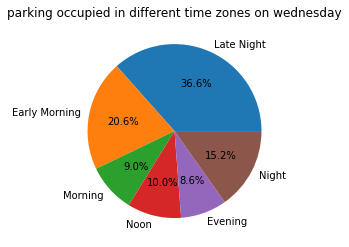

In [29]:
import pylab
parking_wednesday= parking_data1[parking_data1['Weekdays']=='Wednesday'].groupby('session')['duration_occupied'].mean()
parking_wednesday.plot.pie(autopct="%.1f%%")
pylab.ylabel('')
plt.title('parking occupied in different time zones on wednesday')

Text(0.5, 1.0, 'parking occupied in different time zones on Thursday')

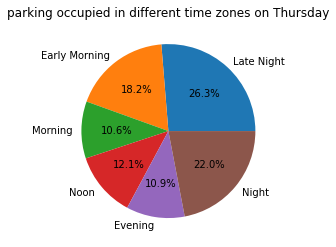

In [30]:
import pylab
parking_thursday= parking_data1[parking_data1['Weekdays']=='Thursday'].groupby('session')['duration_occupied'].mean()
parking_thursday.plot.pie(autopct="%.1f%%")
pylab.ylabel('')
plt.title('parking occupied in different time zones on Thursday')

Text(0.5, 1.0, 'parking occupied in different time zones on Friday')

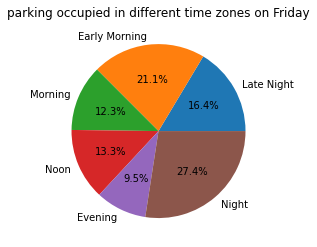

In [31]:
import pylab
parking_friday= parking_data1[parking_data1['Weekdays']=='Friday'].groupby('session')['duration_occupied'].mean()
parking_friday.plot.pie(autopct="%.1f%%")
pylab.ylabel('')
plt.title('parking occupied in different time zones on Friday')

Text(0.5, 1.0, 'parking occupied in different time zones on saturday')

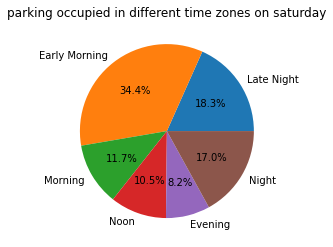

In [32]:
import pylab
parking_saturday= parking_data1[parking_data1['Weekdays']=='Saturday'].groupby('session')['duration_occupied'].mean()
parking_saturday.plot.pie(autopct="%.1f%%")
pylab.ylabel('')
plt.title('parking occupied in different time zones on saturday')

Text(0.5, 1.0, 'parking occupied in different time zones on sunday')

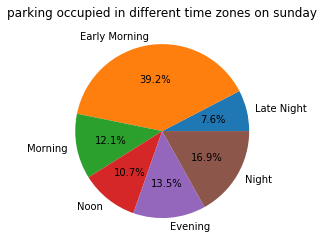

In [33]:
import pylab
parking_sunday= parking_data1[parking_data1['Weekdays']=='Sunday'].groupby('session')['duration_occupied'].mean()
parking_sunday
parking_sunday.plot.pie(autopct="%.1f%%")
pylab.ylabel('')
plt.title('parking occupied in different time zones on sunday')